<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

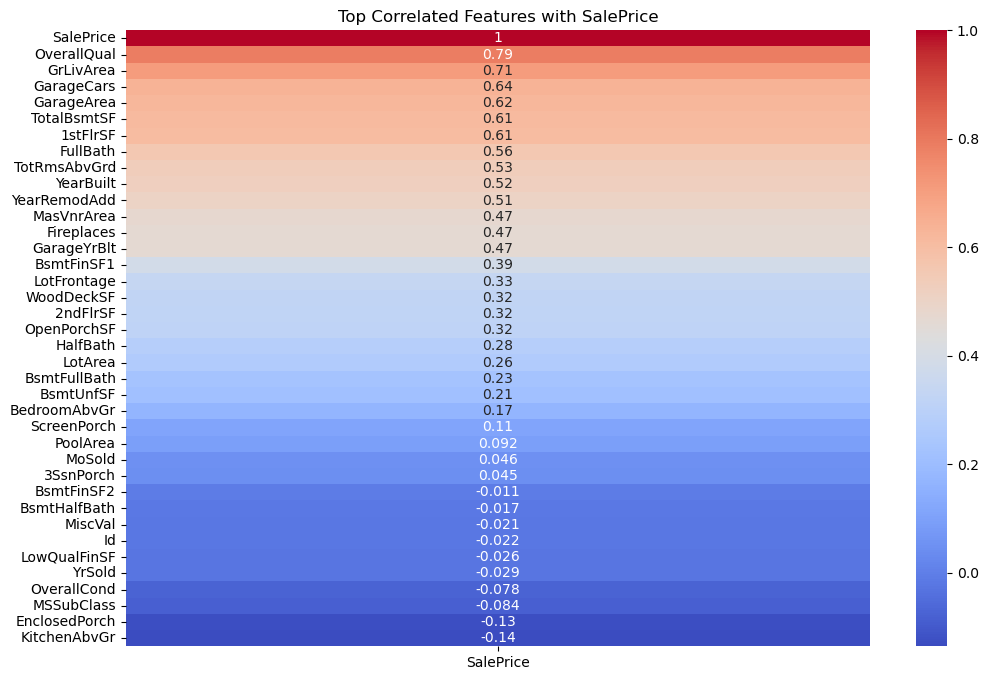

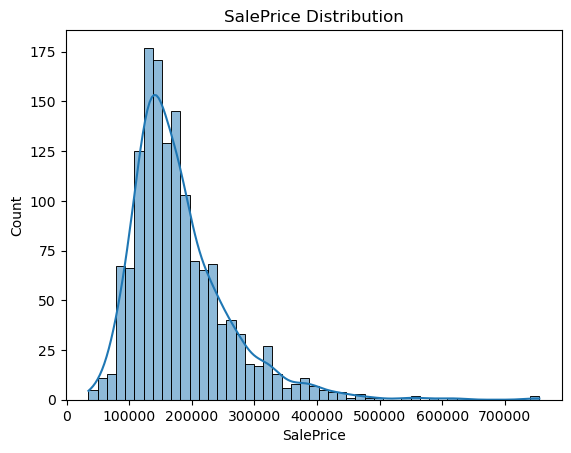


📌 Linear Regression Model Performance:
MAE: 25319.86044431363
MSE: 1576962754.8842618
RMSE: 39710.99035385874
R² Score: 0.7944073417103641

📌 Ridge Regression Model Performance:
MAE: 25318.16487750464
MSE: 1577318815.0522852
RMSE: 39715.47324472271
R² Score: 0.7943609212377003

📌 Lasso Regression Model Performance:
MAE: 25319.8572441955
MSE: 1576964868.5330698
RMSE: 39711.0169667445
R² Score: 0.7944070661485756
OverallQual: 28351.67
GrLivArea: 27312.15
GarageCars: 11451.97
TotalBsmtSF: 10733.81
FullBath: -2985.61
YearBuilt: 10594.92


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)

# Save model and scaler
joblib.dump(model, "house_model.pkl")
joblib.dump(scaler, "scaler.pkl")


# Load data
df = pd.read_csv("train.csv")
df.shape, df.columns

df.head()
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)

# Data Cleaning
# Drop columns with too many missing values
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

# Fill missing values for numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum().sum()  # Should be 0

# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with SalePrice")
plt.show()

# Distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

# Feature Engineering
# Select top features for simplicity
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
df_model = df[top_features]

# Split features/target
X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training & Evaluation
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 {name} Model Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

# Linear Regression
evaluate_model(LinearRegression(), "Linear Regression")

# Ridge Regression
evaluate_model(Ridge(alpha=1.0), "Ridge Regression")

# Lasso Regression
evaluate_model(Lasso(alpha=0.1), "Lasso Regression")

# Feature Importance (Linear Model)
model = LinearRegression()
model.fit(X_train, y_train)

importance = model.coef_
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]:.2f}")
